In [ ]:
# Supervised Learning Models: Part 1 

<IPython.core.display.Javascript object>


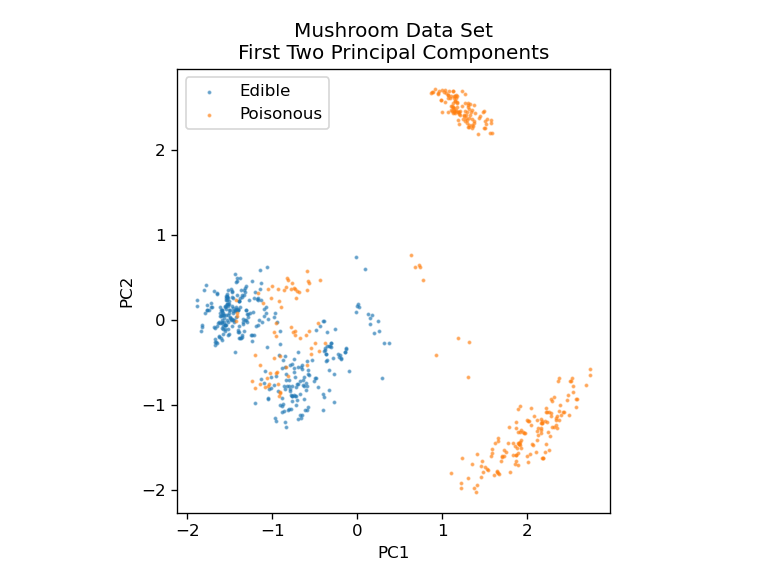

In [3]:
# Binary Classification Model

%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# import source data

df = pd.read_csv('mushrooms.csv')
df2 = pd.get_dummies(df)

df3 = df2.sample(frac=0.08)

# get X_data
X = df3.iloc[:,2:]
# get y_data target label
y = df3.iloc[:,1]


pca = PCA(n_components=2).fit_transform(X)

# divide source data into train-set and test-set
X_train, X_test, y_train, y_test = train_test_split(pca, y, random_state=0)


plt.figure(dpi=120)
plt.scatter(pca[y.values==0,0], pca[y.values==0,1], alpha=0.5, label='Edible', s=2)
plt.scatter(pca[y.values==1,0], pca[y.values==1,1], alpha=0.5, label='Poisonous', s=2)
plt.legend()
plt.title('Mushroom Data Set\nFirst Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.gca().set_aspect('equal')

In [20]:
def plot_mushroom_boundary(X, y, fitted_model):

    plt.figure(figsize=(9.8,5), dpi=100)
    
    for i, plot_type in enumerate(['Decision Boundary', 'Decision Probabilities']):
        plt.subplot(1,2,i+1)

        mesh_step_size = 0.01  # step size in the mesh
        x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
        y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size), np.arange(y_min, y_max, mesh_step_size))
        if i == 0:
            Z = fitted_model.predict(np.c_[xx.ravel(), yy.ravel()])
        else:
            try:
                Z = fitted_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
            except:
                plt.text(0.4, 0.5, 'Probabilities Unavailable', horizontalalignment='center',
                     verticalalignment='center', transform = plt.gca().transAxes, fontsize=12)
                plt.axis('off')
                break
        Z = Z.reshape(xx.shape)
        plt.scatter(X[y.values==0,0], X[y.values==0,1], alpha=0.4, label='Edible', s=5)
        plt.scatter(X[y.values==1,0], X[y.values==1,1], alpha=0.4, label='Posionous', s=5)
        plt.imshow(Z, interpolation='nearest', cmap='RdYlBu_r', alpha=0.15, 
                   extent=(x_min, x_max, y_min, y_max), origin='lower')
        plt.title(plot_type + '\n' + 
                  str(fitted_model).split('(')[0]+ ' Test Accuracy: ' + str(np.round(fitted_model.score(X, y), 5)))
        plt.gca().set_aspect('equal');
        
    plt.tight_layout()
    plt.subplots_adjust(top=0.9, bottom=0.08, wspace=0.02)

<IPython.core.display.Javascript object>


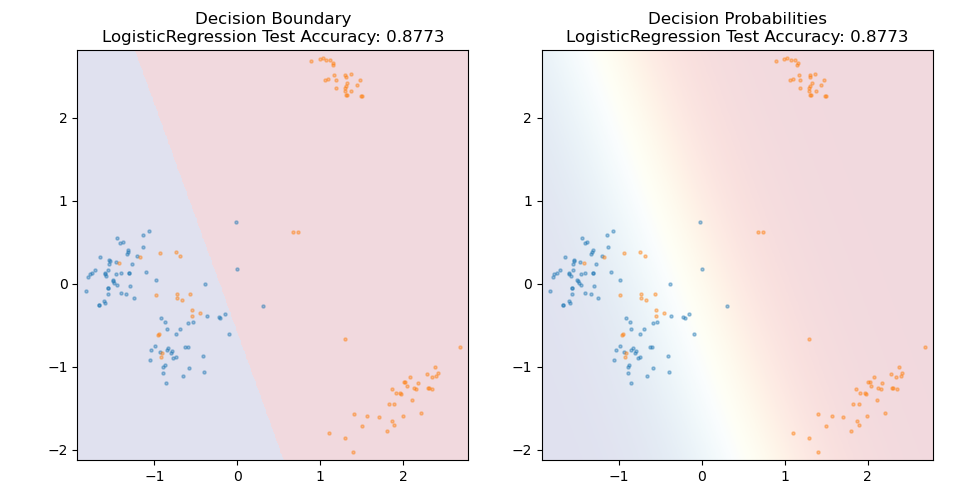

Model train-set score:  0.8747433264887063
Model test-set score:  0.8773006134969326


In [29]:
from sklearn.linear_model import LogisticRegression

# LogisticReg: apply non_lin compress [0-1] probability function
# to y target output
#  y target objective function:
#  y(f_nonlin)= 1/(1+exp^(-(b+w1*x1...wn*xn)) )

model = LogisticRegression()
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("Model train-set score: ",train_score) 
print("Model test-set score: ",test_score)

<IPython.core.display.Javascript object>


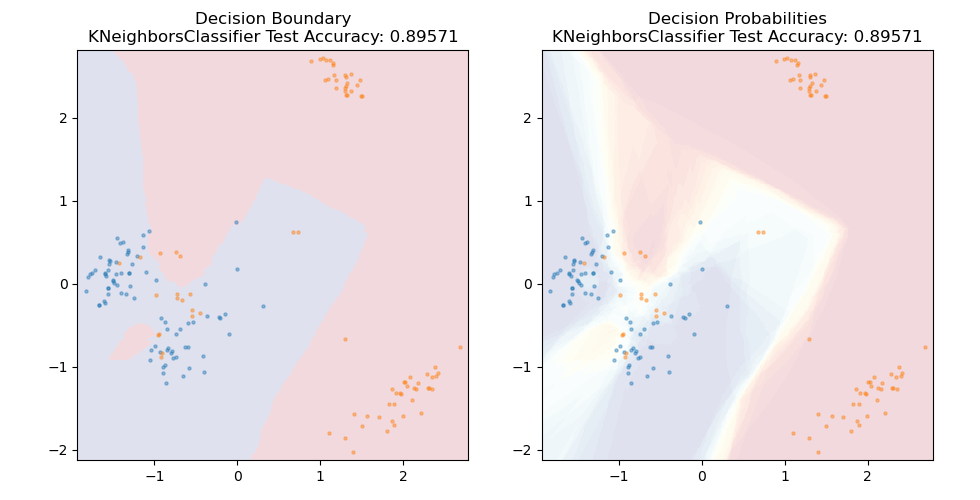

Model train-set score:  0.9342915811088296
Model test-set score:  0.8957055214723927


In [28]:
from sklearn.neighbors import KNeighborsClassifier

# KNN Binary Classifier,  parameters: number of k-n_neighbors to vote


# create KNeighborsClassifier model with k=n_neighbors=20
model = KNeighborsClassifier(n_neighbors=20)
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("Model train-set score: ",train_score) 
print("Model test-set score: ",test_score)


In [1]:
from sklearn.tree import DecisionTreeClassifier

# DecisionTree Classifier, parameters:  control model complexity max_depth


# create DecisionTreeClassifier(max_depth=3) model, control model complexity
# max_depth=3, max number of split point nodes
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("Model train-set score: ",train_score) 
print("Model test-set score: ",test_score)

NameError: name 'X_train' is not defined

<IPython.core.display.Javascript object>


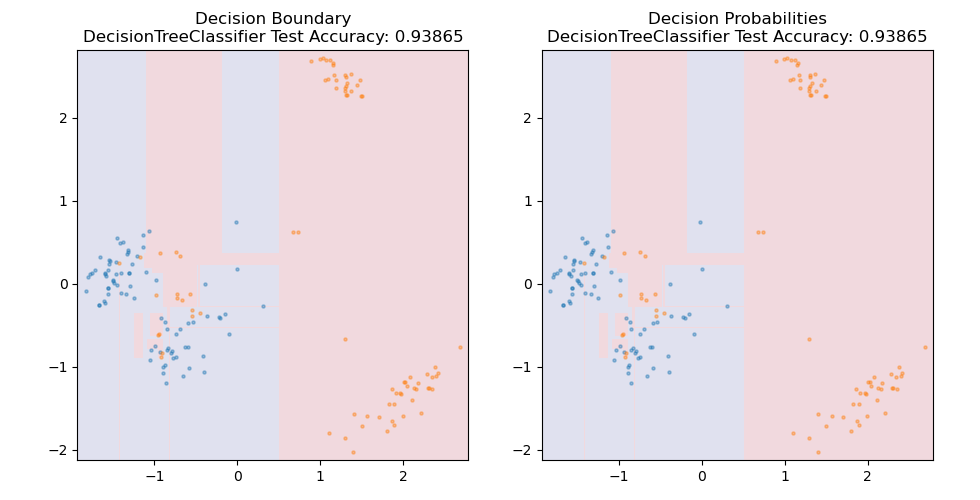

Model train-set score:  1.0
Model test-set score:  0.9386503067484663


In [32]:
from sklearn.tree import DecisionTreeClassifier

# DecisionTree Classifier, parameters: no control complexity 

model = DecisionTreeClassifier()
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("Model train-set score: ",train_score) 
print("Model test-set score: ",test_score)

<IPython.core.display.Javascript object>


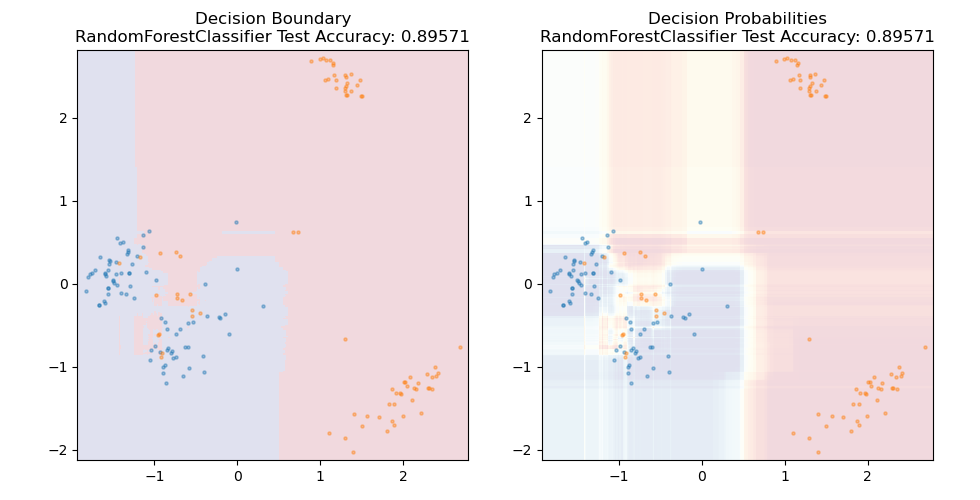

Model train-set score:  1.0
Model test-set score:  0.8957055214723927


In [34]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("Model train-set score: ",train_score) 
print("Model test-set score: ",test_score)


<IPython.core.display.Javascript object>


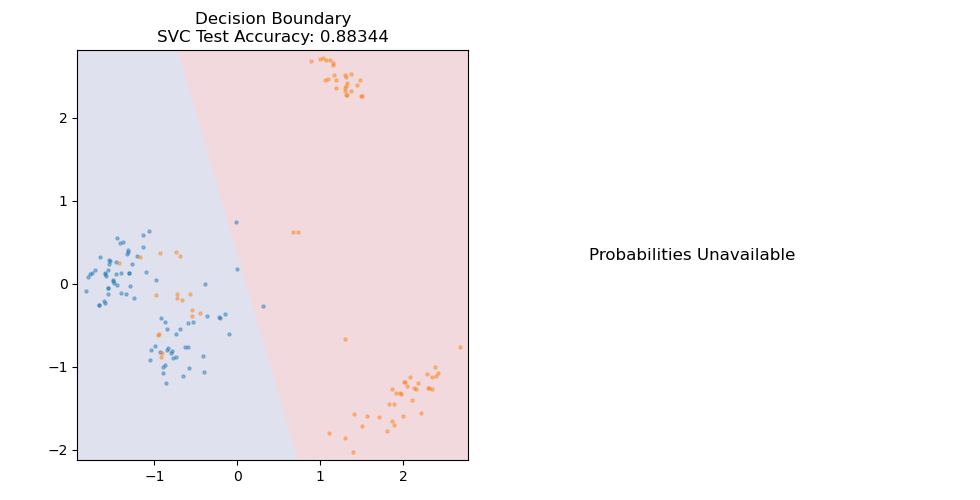

Model train-set score:  0.8829568788501027
Model test-set score:  0.8834355828220859


In [36]:
from sklearn.svm import SVC

# SVector Machine,  parameters:  kernel=linear  

# Apply sign (+-) function to y target


model = SVC(kernel='linear')
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("Model train-set score: ",train_score) 
print("Model test-set score: ",test_score)

<IPython.core.display.Javascript object>


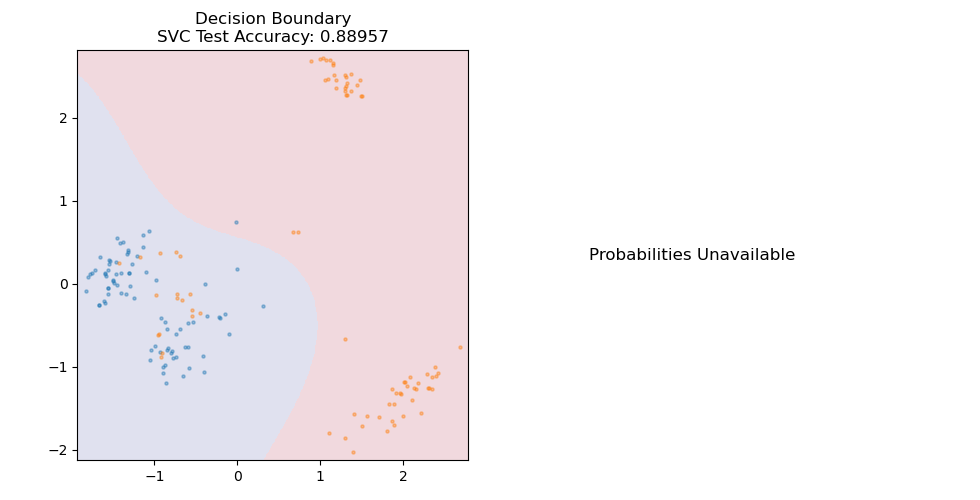

Model train-set score:  0.8973305954825462
Model test-set score:  0.8895705521472392


In [37]:
from sklearn.svm import SVC

# SVector Machine,  parameters:  kernel=linear, C=c_reg regularization
# large C is LESS reg and fits better,
# small C is MORE reg and fits worst 


model = SVC(kernel='rbf', C=1)
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("Model train-set score: ",train_score) 
print("Model test-set score: ",test_score)

<IPython.core.display.Javascript object>


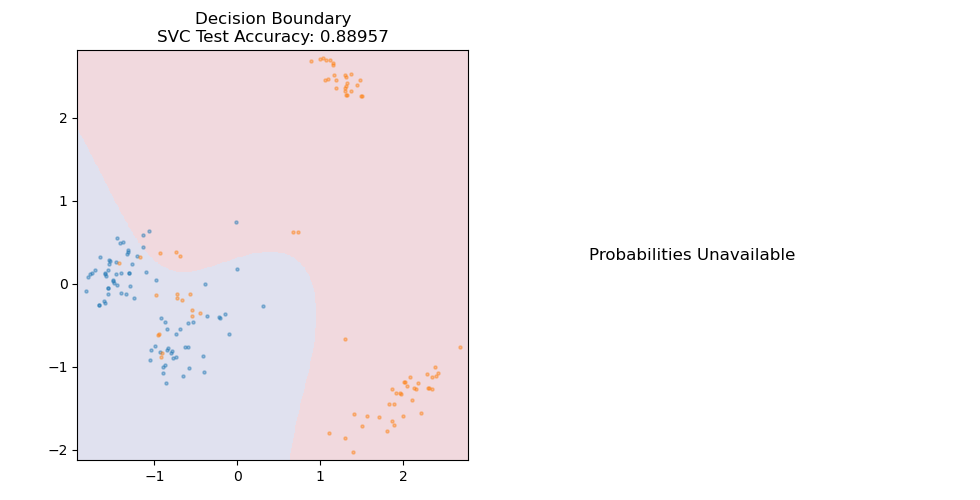

Model train-set score:  0.9322381930184805
Model test-set score:  0.8895705521472392


In [39]:
from sklearn.svm import SVC

# SVector Machine,  parameters:  kernel=linear, C=c_reg regularization
# large C is LESS reg and fits better,

model = SVC(kernel='rbf', C=10)
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("Model train-set score: ",train_score) 
print("Model test-set score: ",test_score)


<IPython.core.display.Javascript object>


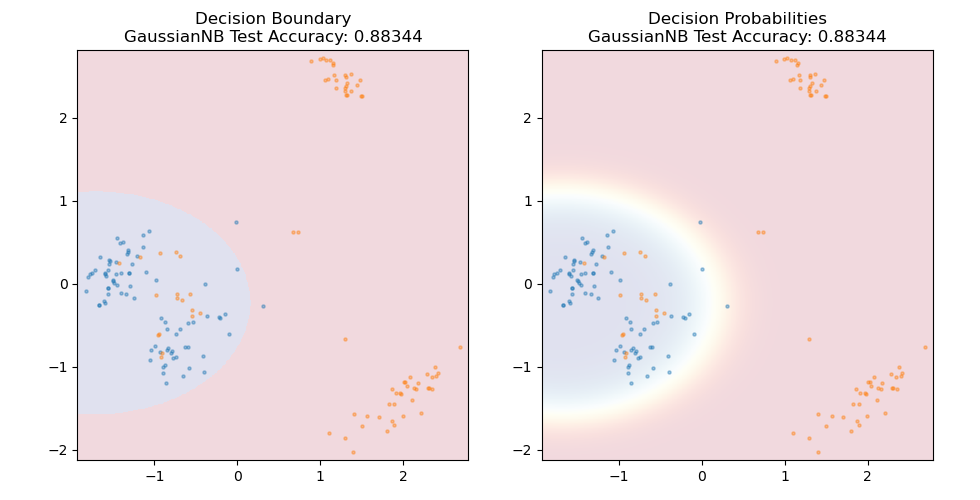

Model train-set score:  0.8809034907597536
Model test-set score:  0.8834355828220859


In [41]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("Model train-set score: ",train_score) 
print("Model test-set score: ",test_score)

C:\Users\Diego\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


<IPython.core.display.Javascript object>


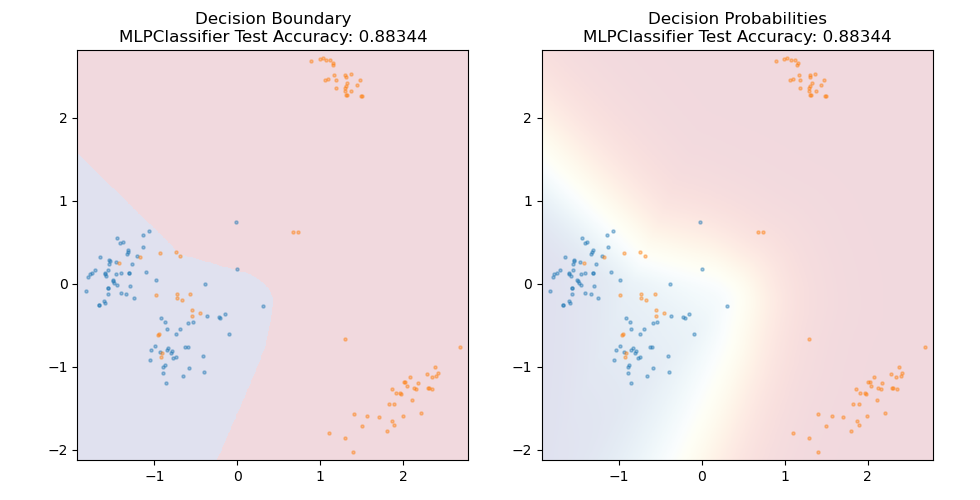

Model train-set score:  0.9117043121149897
Model test-set score:  0.8834355828220859


In [42]:
from sklearn.neural_network import MLPClassifier

# ML PClassiffier  Neural network: no parameters

model = MLPClassifier()
model.fit(X_train,y_train)

plot_mushroom_boundary(X_test, y_test, model)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("Model train-set score: ",train_score) 
print("Model test-set score: ",test_score)